In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
df = pd.read_excel("DataFile.xlsx")
df.head()

,Route,Departing Port,Arriving Port,Airline,Month,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures \n(%),OnTime Arrivals \n(%),Cancellations \n\n(%)
0,Adelaide-Brisbane,Adelaide,Brisbane,Jetstar,2020-01-01,30,27,3,18,19,9,8,66.666667,70.37037,10.000000
1,Adelaide-Gold Coast,Adelaide,Gold Coast,Jetstar,2020-01-01,31,30,1,15,14,15,16,50,46.666667,3.225806
2,Adelaide-Melbourne,Adelaide,Melbourne,Jetstar,2020-01-01,119,106,13,61,66,45,40,57.54717,62.264151,10.924370
3,Adelaide-Perth,Adelaide,Perth,Jetstar,2020-01-01,21,20,1,11,16,9,4,55.0,80,4.761905
4,Adelaide-Sydney,Adelaide,Sydney,Jetstar,2020-01-01,91,87,4,69,69,18,18,79.310345,79.310345,4.395604


In [2]:
df.rename(columns={
    'OnTime Departures \n(%)' : 'OnTime Departures', 
    'OnTime Arrivals \n(%)' :'OnTime Arrivals', 
    'Cancellations \n\n(%)' : 'Cancellations'}, inplace = True)

In [3]:
df.isna().sum()

Route                 0
Departing Port        0
Arriving Port         0
Airline               0
Month                 0
Sectors Scheduled     0
Sectors Flown         0
Cancellations         0
Departures On Time    0
Arrivals On Time      0
Departures Delayed    0
Arrivals Delayed      0
OnTime Departures     0
OnTime Arrivals       0
Cancellations         0
dtype: int64

In [4]:
#Changing the datatypes for further analysis.
df['OnTime Departures'] = pd.to_numeric(df['OnTime Departures'], errors='coerce')
df['OnTime Arrivals'] = pd.to_numeric(df['OnTime Arrivals'], errors='coerce')

#Our dataset contains airline information till the year 2024, but we only require till 2023 for our analysis.
#Hence, creating a separate column with the Year for easy sorting.
df['Year'] = df['Month'].dt.year

In [5]:
#There is a data known as "All Ports" which is basically the aggregate of all the ports since the number is massive.
#It is better to remove the data for proper analysis. This could be a potential outlier.
columns_to_drop = df.columns[df.apply(lambda col: col.astype(str).str.contains('All Ports')).any()]

print("Columns to drop:", columns_to_drop)

Columns to drop: Index(['Route', 'Departing Port', 'Arriving Port'], dtype='object')


In [6]:
#dropping columns which has value All Ports - All Ports
df.drop(index=df[df['Departing Port'] == 'All Ports'].index, inplace=True)

In [7]:
df.dtypes

Route                         object
Departing Port                object
Arriving Port                 object
Airline                       object
Month                 datetime64[ns]
Sectors Scheduled              int64
Sectors Flown                  int64
Cancellations                  int64
Departures On Time             int64
Arrivals On Time               int64
Departures Delayed             int64
Arrivals Delayed               int64
OnTime Departures            float64
OnTime Arrivals              float64
Cancellations                float64
Year                           int32
dtype: object

In [8]:
df_new = df[["Year","Route","Sectors Flown","Departures On Time","Arrivals On Time"]].copy()
df_new

,Year,Route,Sectors Flown,Departures On Time,Arrivals On Time
0,2020,Adelaide-Brisbane,27,18,19
1,2020,Adelaide-Gold Coast,30,15,14
2,2020,Adelaide-Melbourne,106,61,66
3,2020,Adelaide-Perth,20,11,16
4,2020,Adelaide-Sydney,87,69,69
...,...,...,...,...,...
20518,2023,Sydney-Sunshine Coast,219,142,136
20519,2023,Sydney-Wagga Wagga,189,128,132
20520,2023,Townsville-Brisbane,322,198,196
20521,2023,Townsville-Cairns,143,119,119


## Code and Output for Question 1

In [9]:
#Q1 a) Year wise best and worst Five routes with On time departure
grouped_df = df_new.groupby(["Year","Route"]).sum()
 
 
grouped_df["Departures On Time Ratio"] = (grouped_df["Departures On Time"] / grouped_df["Sectors Flown"])*100
grouped_df["Arrival On Time Ratio"] = (grouped_df["Arrivals On Time"] / grouped_df["Sectors Flown"])*100

df_sorted_desc_dep = grouped_df.sort_values(['Year','Departures On Time Ratio'],ascending=[True, False])
df_sorted_asc_dep = grouped_df.sort_values(['Year','Departures On Time Ratio'],ascending=[True, True])

columns_to_view = ["Departures On Time Ratio"]
best_departure = df_sorted_desc_dep.groupby('Year').head(5)[columns_to_view]
worst_departure = df_sorted_asc_dep.groupby('Year').head(5)[columns_to_view]

print('Best Departure:')
print(best_departure)
print('Worst Departure:')
print(worst_departure)

Best Departure:
                               Departures On Time Ratio
Year Route                                             
2020 Alice Springs-Darwin                     95.454545
     Cairns-Townsville                        93.093093
     Brisbane-Emerald                         92.307692
     Perth-Darwin                             92.280702
     Perth-Port Hedland                       92.093023
2021 Brisbane-Mount Isa                       94.941634
     Brisbane-Gladstone                       93.981481
     Brisbane-Hamilton Island                 93.240343
     Brisbane-Emerald                         92.949907
     Emerald-Brisbane                         92.631579
2022 Cairns-Townsville                        86.624204
     Brisbane-Hamilton Island                 85.082174
     Adelaide-Alice Springs                   83.760684
     Brisbane-Emerald                         83.483290
     Adelaide-Gold Coast                      82.157124
2023 Cairns-Townsville          

In [10]:
#Q1 b) Year wise best and worst Five routes with On time Arrivals
grouped_df = df_new.groupby(["Year","Route"]).sum()
 
 
grouped_df["Departures On Time Ratio"] = (grouped_df["Departures On Time"] / grouped_df["Sectors Flown"])*100
grouped_df["Arrival On Time Ratio"] = (grouped_df["Arrivals On Time"] / grouped_df["Sectors Flown"])*100

df_sorted_desc_arr = grouped_df.sort_values(['Year','Arrival On Time Ratio'],ascending=[True, False])
df_sorted_asc_arr = grouped_df.sort_values(['Year','Arrival On Time Ratio'],ascending=[True, True])

columns_to_view = ["Arrival On Time Ratio"]
best_arrival = df_sorted_desc_arr.groupby('Year').head(5)[columns_to_view]
worst_arrival = df_sorted_asc_arr.groupby('Year').head(5)[columns_to_view]


print('Best Arrival:')
print(best_arrival)
print('Worst Arrival:')
print(worst_arrival)

Best Arrival:
                               Arrival On Time Ratio
Year Route                                          
2020 Alice Springs-Darwin                  95.454545
     Cairns-Townsville                     93.293293
     Brisbane-Emerald                      92.568449
     Emerald-Brisbane                      91.492147
     Adelaide-Canberra                     91.420118
2021 Emerald-Brisbane                      93.188854
     Brisbane-Emerald                      92.888064
     Adelaide-Gold Coast                   92.181818
     Brisbane-Gladstone                    91.956019
     Townsville-Cairns                     91.823056
2022 Cairns-Townsville                     87.376954
     Brisbane-Hamilton Island              84.323641
     Brisbane-Emerald                      83.483290
     Townsville-Cairns                     83.449074
     Perth-Newman                          81.001549
2023 Townsville-Cairns                     88.304784
     Cairns-Townsville          

## Code and output for Question 2

In [26]:
#Q2 a) Year wise best and worst Five routes with On time departure
 
# Function to normalize route
def same_route(route):
    parts = route.split('-')
    same_route = '-'.join(sorted(parts))
    return same_route
 
 
# Apply the normalization function to the 'Route' column
df_new['same_route'] = df_new['Route'].apply(same_route)
 
# Aggregate the 'Number_of_Rides' column based on the normalized routes
aggregated_data = df_new.groupby(['Year','same_route'], as_index=False).agg({
    'Departures On Time': 'sum',
    'Sectors Flown': 'sum'
    })
 
aggregated_data['Ontime departure %'] = (aggregated_data['Departures On Time']/aggregated_data['Sectors Flown'])*100

aggregated_data_desc_dep = aggregated_data.sort_values(['Year', 'Ontime departure %'],ascending=[True, False])
aggregated_data_asc_dep =  aggregated_data.sort_values(['Year', 'Ontime departure %'],ascending=[True, True])

columns_to_view = ["Year", "same_route", "Ontime departure %"]
best_departure = aggregated_data_desc_dep.groupby('Year').head(5)[columns_to_view]
worst_departure = aggregated_data_asc_dep.groupby('Year').head(5)[columns_to_view]

print('Best Departure:')
print(best_departure)
print('Worst Departure:')
print(worst_departure)

Best Departure:
     Year             same_route  Ontime departure %
9    2020   Alice Springs-Darwin           93.181818
17   2020       Brisbane-Emerald           92.096669
33   2020      Cairns-Townsville           91.415663
46   2020       Kalgoorlie-Perth           89.497307
2    2020      Adelaide-Canberra           88.905325
78   2021       Brisbane-Emerald           92.790842
79   2021     Brisbane-Gladstone           92.301013
84   2021     Brisbane-Mount Isa           92.257645
67   2021    Adelaide-Gold Coast           90.263876
94   2021      Cairns-Townsville           89.682805
154  2022      Cairns-Townsville           83.965268
136  2022       Brisbane-Emerald           81.364660
128  2022  Adelaide-Port Lincoln           80.636446
124  2022      Adelaide-Canberra           77.071391
143  2022     Brisbane-Mount Isa           76.751801
216  2023      Cairns-Townsville           87.691402
191  2023  Adelaide-Port Lincoln           84.342762
186  2023      Adelaide-Canber

In [27]:
#Q2 b) Year wise best and worst Five routes with On time Arrivals
 
# Aggregate the 'Number_of_Rides' column based on the normalized routes
aggregated_data = df_new.groupby(['Year','same_route'], as_index=False).agg({
    'Arrivals On Time': 'sum',
    'Sectors Flown': 'sum'
    })
 
aggregated_data['Ontime arrival %'] = (aggregated_data['Arrivals On Time']/aggregated_data['Sectors Flown'])*100


aggregated_data_desc_arr = aggregated_data.sort_values(['Year', 'Ontime arrival %'],ascending=[True, False])
aggregated_data_asc_arr =  aggregated_data.sort_values(['Year', 'Ontime arrival %'],ascending=[True, True])
columns_to_view = ["Year", "same_route", "Ontime arrival %"]
best_arrival = aggregated_data_desc_arr.groupby('Year').head(5)[columns_to_view]
worst_arrival= aggregated_data_asc_arr.groupby('Year').head(5)[columns_to_view]

print('Best Arrival:')
print(best_arrival)
print('Worst Arrival:')
print(worst_arrival)

Best Arrival:
     Year                same_route  Ontime arrival %
33   2020         Cairns-Townsville         92.218876
17   2020          Brisbane-Emerald         92.031352
46   2020          Kalgoorlie-Perth         89.362657
9    2020      Alice Springs-Darwin         88.636364
19   2020  Brisbane-Hamilton Island         88.601959
78   2021          Brisbane-Emerald         93.038366
67   2021       Adelaide-Gold Coast         91.719745
72   2021             Albury-Sydney         91.298527
94   2021         Cairns-Townsville         91.285476
84   2021        Brisbane-Mount Isa         90.826285
154  2022         Cairns-Townsville         85.412446
136  2022          Brisbane-Emerald         82.072739
138  2022  Brisbane-Hamilton Island         79.024081
128  2022     Adelaide-Port Lincoln         78.835185
143  2022        Brisbane-Mount Isa         76.751801
216  2023         Cairns-Townsville         88.103651
206  2023        Brisbane-Mount Isa         83.213256
191  2023     

## Code and output for Question 3

In [13]:
#Q3 ) Year wise best and worst Five routes with On time departure

# 75th percentile of the number of sectors flown (per route) 
percentile_75 = df['Sectors Flown'].quantile(0.75)
print(f"75th percentile of sectors flown: {percentile_75}")

75th percentile of sectors flown: 128.0


In [14]:
#displaying data with Sectors Flown > 128
filtered_df = df[df['Sectors Flown'] >= percentile_75]
filtered_df.reset_index()

,index,Route,Departing Port,Arriving Port,Airline,Month,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures,OnTime Arrivals,Cancellations,Year
0,12,Brisbane-Melbourne,Brisbane,Melbourne,Jetstar,2020-01-01,183,171,12,103,113,68,58,60.233918,66.081871,6.557377,2020
1,15,Brisbane-Sydney,Brisbane,Sydney,Jetstar,2020-01-01,152,146,6,109,105,37,41,74.657534,71.917808,3.947368,2020
2,24,Gold Coast-Melbourne,Gold Coast,Melbourne,Jetstar,2020-01-01,182,176,6,83,105,93,71,47.159091,59.659091,3.296703,2020
3,25,Gold Coast-Sydney,Gold Coast,Sydney,Jetstar,2020-01-01,289,278,11,166,190,112,88,59.712230,68.345324,3.806228,2020
4,28,Hobart-Melbourne,Hobart,Melbourne,Jetstar,2020-01-01,214,211,3,131,122,80,89,62.085308,57.819905,1.401869,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080,20518,Sydney-Sunshine Coast,Sydney,Sunshine Coast,All Airlines,2023-11-01,223,219,4,142,136,77,83,64.840183,62.100457,1.793722,2023
5081,20519,Sydney-Wagga Wagga,Sydney,Wagga Wagga,All Airlines,2023-11-01,194,189,5,128,132,61,57,67.724868,69.841270,2.577320,2023
5082,20520,Townsville-Brisbane,Townsville,Brisbane,All Airlines,2023-11-01,326,322,4,198,196,124,126,61.490683,60.869565,1.226994,2023
5083,20521,Townsville-Cairns,Townsville,Cairns,All Airlines,2023-11-01,155,143,12,119,119,24,24,83.216783,83.216783,7.741935,2023


In [15]:
q3_asc = filtered_df.sort_values(by = 'OnTime Departures', ascending = False).head()
q3_asc[['Route', 'OnTime Departures']]

,Route,OnTime Departures
9724,Adelaide-Sydney,97.841727
4129,Emerald-Brisbane,97.794118
8030,Perth-Port Hedland,97.714286
8832,Adelaide-Melbourne,97.500000
205,Adelaide-Port Lincoln,97.159091


In [16]:
q3_desc = filtered_df.sort_values(by = 'OnTime Departures', ascending = True).head()
q3_desc[['Route', 'OnTime Departures']]

,Route,OnTime Departures
10691,Melbourne-Perth,22.556391
10716,Sydney-Perth,26.451613
12155,Melbourne-Perth,29.447853
11953,Broome-Perth,30.136986
12179,Sydney-Perth,30.588235


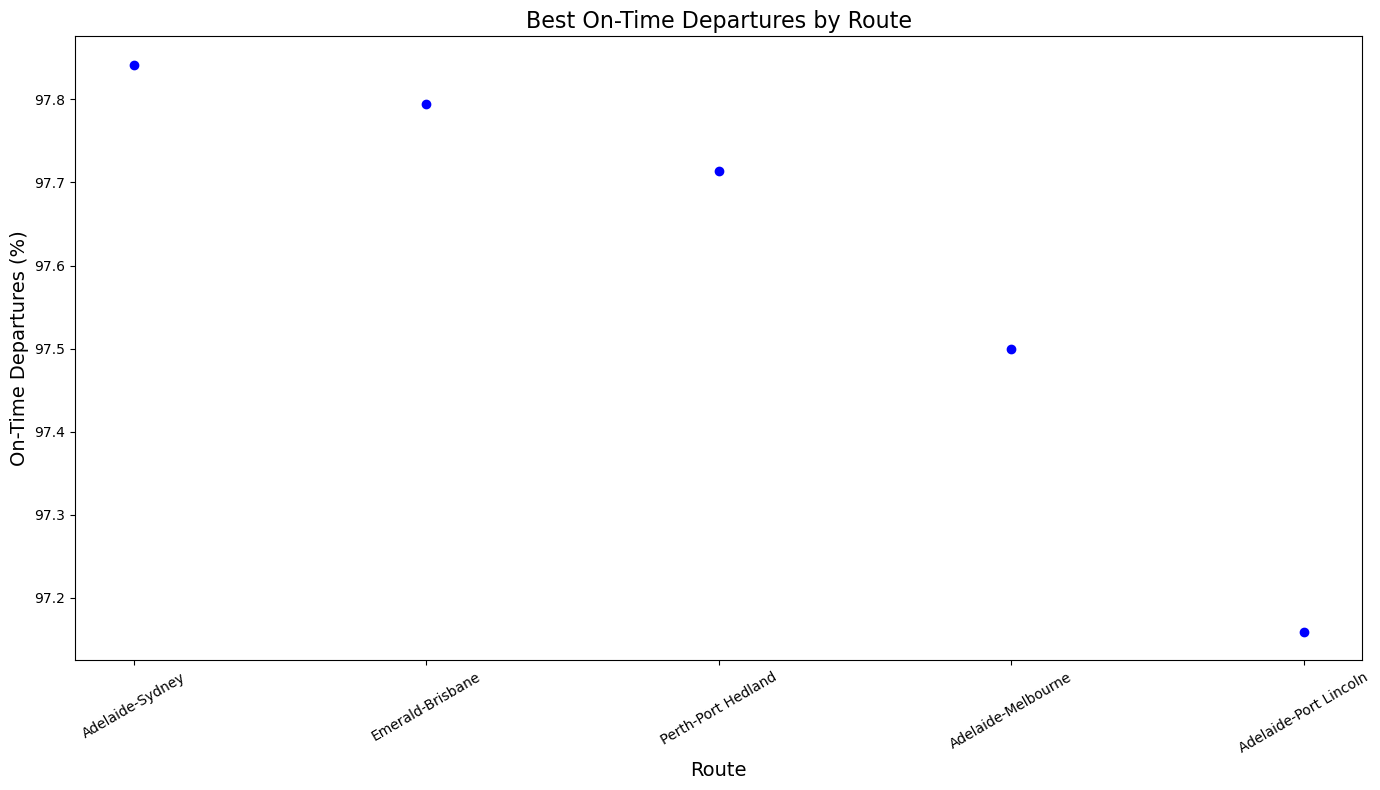

In [49]:
routes = q3_asc["Route"]
on_time_departures = q3_asc["OnTime Departures"]
plt.figure(figsize=(14, 8))
plt.scatter(routes, on_time_departures, color='blue')

# mentioning titles and labels
plt.title('Best On-Time Departures by Route', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('On-Time Departures (%)', fontsize=14)

# Rotating the labels for better readability
plt.xticks(rotation=30)

# Displaying the result
plt.tight_layout() 
plt.show()

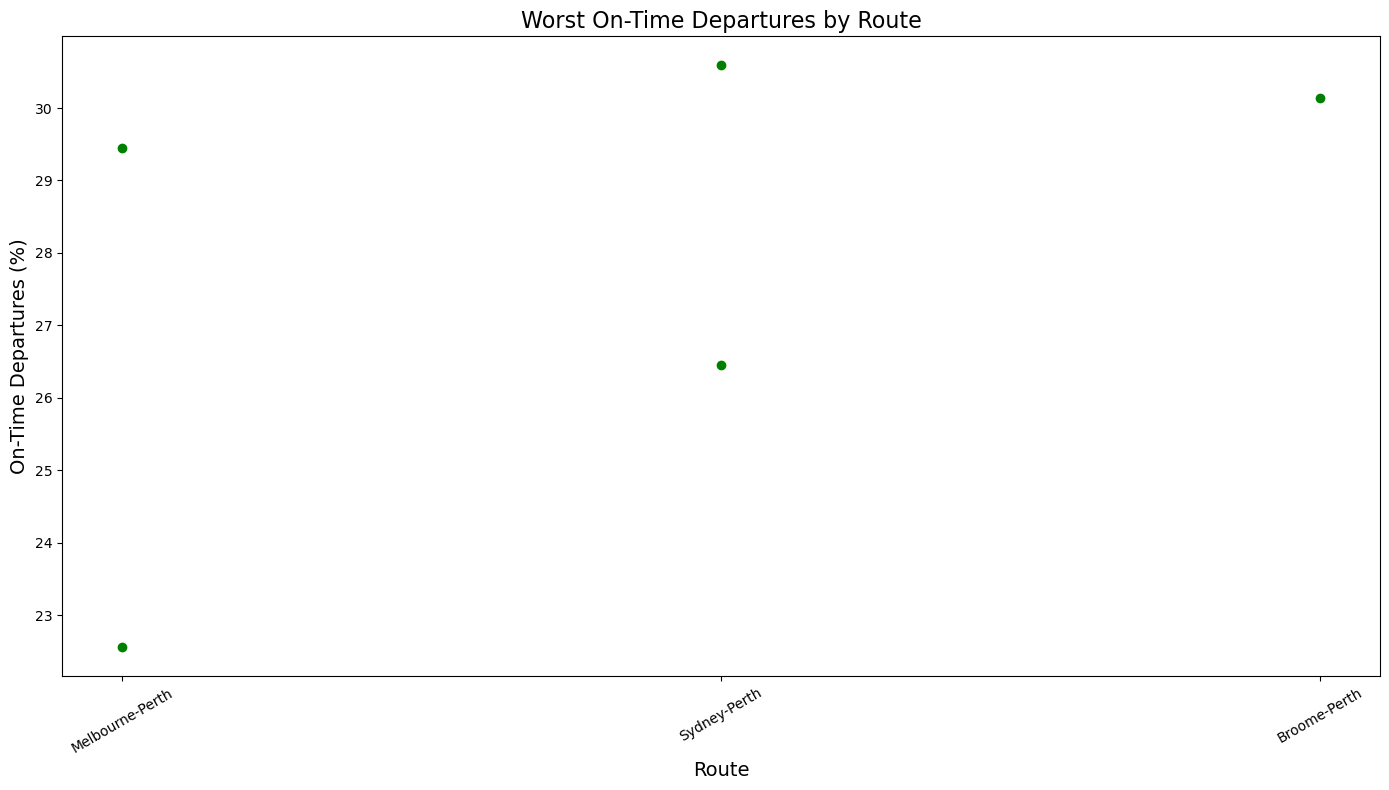

In [47]:
routes = q3_desc["Route"]
on_time_departures = q3_desc["OnTime Departures"]
plt.figure(figsize=(14, 8))
plt.scatter(routes, on_time_departures, color='green')

# mentioning titles and labels
plt.title('Worst On-Time Departures by Route', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('On-Time Departures (%)', fontsize=14)

# Rotating the labels for better readability
plt.xticks(rotation=30)

# Displaying the result
plt.tight_layout() 
plt.show()